# Importing necessary libraries

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Exploratory Data Analysis (EDA)

## Understanding Dataset

In [2]:
#Load the dataset
data=pd.read_excel('Marketing_campaign (Clustering).xlsx')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Checking missing values

In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

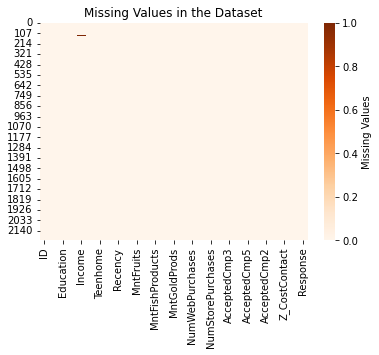

In [7]:
#Plotting missing values
sns.heatmap(data.isnull(), cbar_kws={'label': 'Missing Values'}, cmap='Oranges')
plt.title('Missing Values in the Dataset')
plt.show()

In [8]:
# Drop the null values
data=data.dropna()

In [9]:
print(f"Missing values in data: {data.isnull().sum().sum()}")

Missing values in data: 0


In [10]:
# Remove unnecessary columns 
data.drop(["ID","Z_CostContact","Z_Revenue"],axis=1,inplace=True)

In [11]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


## Exploration

### Univariate Analysis

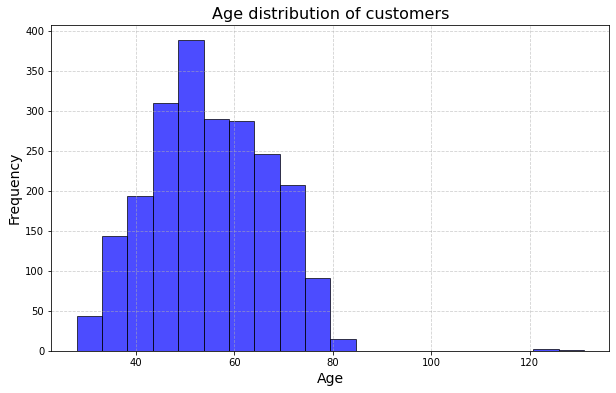

In [12]:
data['Age'] = 2024 - data['Year_Birth']
plt.figure(figsize=(10, 6))
# Normalize color by the bar height
n, bins, patches = plt.hist(data['Age'], bins=20, color='blue', alpha=0.7, edgecolor='black')


plt.title('Age distribution of customers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

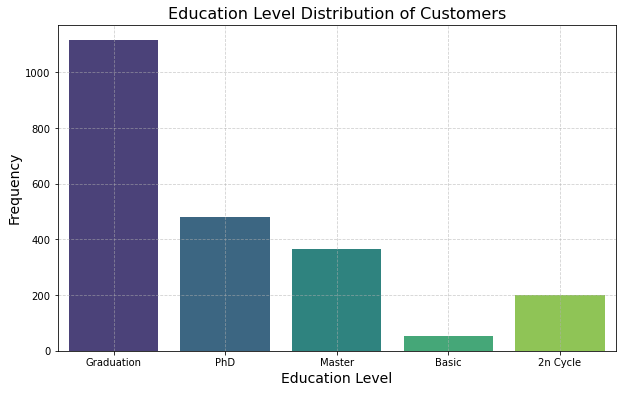

In [13]:
plt.figure(figsize=(10, 6))
# Count occurrences of each education level
sns.countplot(x='Education', data=data, palette='viridis')
plt.title('Education Level Distribution of Customers', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

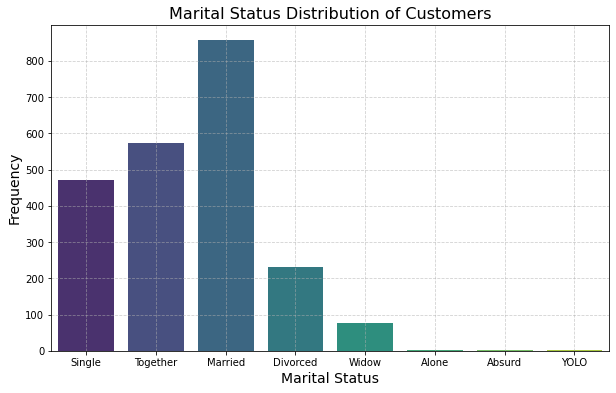

In [14]:
# Create a figure for the Marital_Status plot
plt.figure(figsize=(10, 6))

# Marital status distribution
sns.countplot(x='Marital_Status', data=data, palette='viridis')

plt.title('Marital Status Distribution of Customers', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

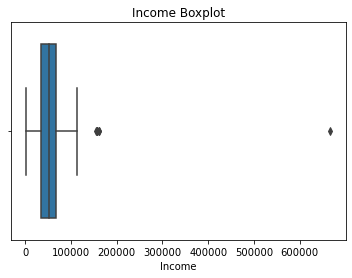

In [15]:
sns.boxplot(x=data['Income'])
plt.title('Income Boxplot')
plt.show()

### Multivariate Analysis

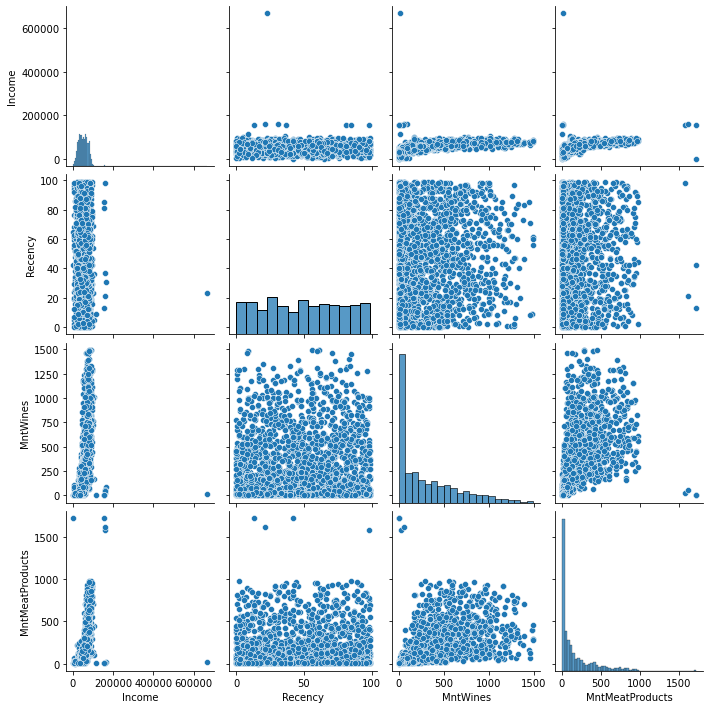

In [16]:
sns.pairplot(data[['Income', 'Recency', 'MntWines', 'MntMeatProducts']])
plt.show()

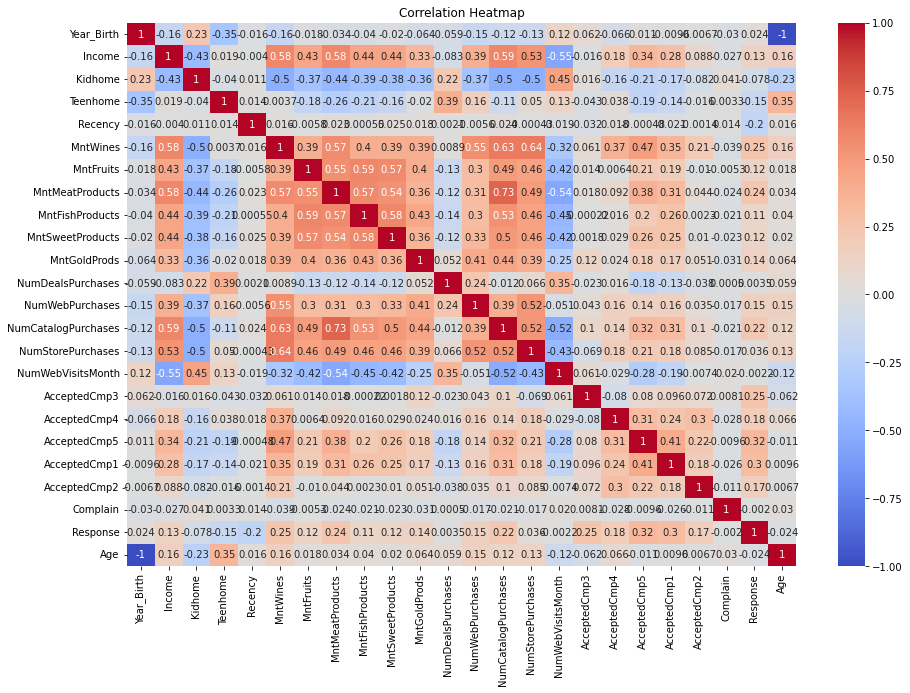

In [17]:
plt.figure(figsize=(15,10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Bivariate Analysis

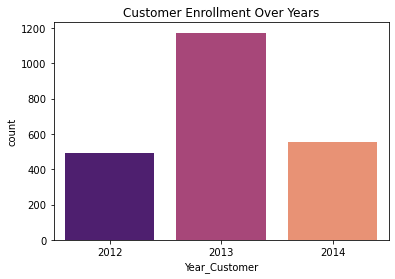

In [18]:
data['Year_Customer'] = data['Dt_Customer'].dt.year
sns.countplot(x='Year_Customer', data=data, palette='magma')
plt.title('Customer Enrollment Over Years')
plt.show()

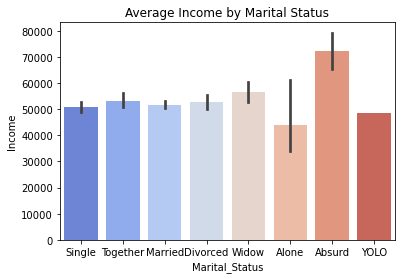

In [19]:
sns.barplot(x='Marital_Status', y='Income', data=data, palette='coolwarm')
plt.title('Average Income by Marital Status')
plt.show()

## Preprocessing

### Handling Outliers

In [20]:
# Calculate Q1, Q3, and IQR
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
# Filter out outliers
data_cleaned = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

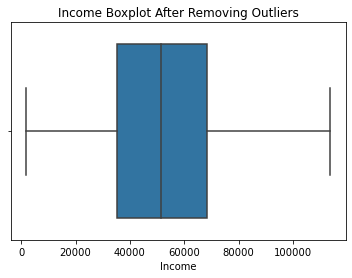

In [22]:
sns.boxplot(x=data_cleaned['Income'])
plt.title('Income Boxplot After Removing Outliers')
plt.show()


In [23]:
# Replacing 'PhD', '2n Cycle', 'Graduation', and 'Master' with 'PG' in the 'Education' column
data['Education'] = data['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 'PG')
# Replacing 'Basic' with 'UG' in the 'Education' column
data['Education'] = data['Education'].replace(['Basic'], 'UG')

In [24]:
# Grouping the 'Married', 'Together' as "relationship
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'relationship')
# Grouping the 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd', as Single
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [25]:
# Combining columns together to reduce number of dimensions
data['Kids'] = data['Kidhome'] + data['Teenhome']
data['Expenses'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] 
                    + data['MntSweetProducts'] + data['MntGoldProds'])

data['TotalAcceptedCmp'] = (data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] 
                            + data['AcceptedCmp5'])

data['TotalNumPurchases'] = (data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] 
                             + data['NumDealsPurchases'])

In [26]:
# Select the necessary columns
data = data[['Education', 'Marital_Status', 'Income', 'Kids', 'Recency', 'Expenses', 'TotalNumPurchases', 
         'TotalAcceptedCmp', 'Complain', 'Response']]

# Machine Learning Model

In [27]:
# list of categorical columns
cat_data = list(data.select_dtypes(include=["object"]).columns)

# print the list of categorical columns
print(cat_data)

['Education', 'Marital_Status']


In [28]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

In [29]:
# One-Hot Encoding for 'Education' and 'Marital_Status'
encoded_data_onehot = pd.get_dummies(ds, columns=['Education', 'Marital_Status'], drop_first=True)

# Display the first few rows of the dataset
print("Dataset after One-Hot Encoding:")
print(encoded_data_onehot.head())

Dataset after One-Hot Encoding:
    Income  Kids  Recency  Expenses  TotalNumPurchases  TotalAcceptedCmp  \
0  58138.0     0       58      1617                 25                 0   
1  46344.0     2       38        27                  6                 0   
2  71613.0     0       26       776                 21                 0   
3  26646.0     1       26        53                  8                 0   
4  58293.0     1       94       422                 19                 0   

   Education_UG  Marital_Status_relationship  
0             0                            0  
1             0                            0  
2             0                            1  
3             0                            1  
4             0                            1  


In [30]:
#Normalization
features_to_scale = encoded_data_onehot.columns 
# Apply StandardScaler to the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_data_onehot[features_to_scale])

# Convert scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=features_to_scale)

# Display the first few rows of the scaled data
print("Scaled Features:")
print(scaled_data.head())

Scaled Features:
     Income      Kids   Recency  Expenses  TotalNumPurchases  \
0  0.234063 -1.264803  0.310532  1.675488           1.319446   
1 -0.234559  1.405806 -0.380509 -0.962358          -1.157987   
2  0.769478 -1.264803 -0.795134  0.280250           0.797881   
3 -1.017239  0.070501 -0.795134 -0.919224          -0.897205   
4  0.240221  0.070501  1.554407 -0.307044           0.537099   

   TotalAcceptedCmp  Education_UG  Marital_Status_relationship  
0         -0.439265     -0.158041                    -1.348829  
1         -0.439265     -0.158041                    -1.348829  
2         -0.439265     -0.158041                     0.741384  
3         -0.439265     -0.158041                     0.741384  
4         -0.439265     -0.158041                     0.741384  


In [31]:
ds

,Education,Marital_Status,Income,Kids,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp
0,PG,Single,58138.0,0,58,1617,25,0
1,PG,Single,46344.0,2,38,27,6,0
2,PG,relationship,71613.0,0,26,776,21,0
3,PG,relationship,26646.0,1,26,53,8,0
4,PG,relationship,58293.0,1,94,422,19,0
...,...,...,...,...,...,...,...,...
2235,PG,relationship,61223.0,1,46,1341,18,0
2236,PG,relationship,64014.0,3,56,444,22,1
2237,PG,Single,56981.0,0,91,1241,19,1
2238,PG,relationship,69245.0,1,8,843,23,0


### Dimensionality Reduction

In [36]:
#Initiating PCA to reduce dimensions aka features to 3
pca = PCA(n_components=3)
scaled_feature=pca.fit_transform(scaled_features)
PCA_data = pd.DataFrame(pca.transform(scaled_data), columns=(["Expenses","Income", "TotalNumPurchases"]))
PCA_data.describe().T

C:\Users\Mansi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
Expenses,2216.0,3.446902e-17,1.683838,-2.963898,-1.484269,-0.281973,1.309153,10.659087
Income,2216.0,1.342688e-17,1.041849,-4.033453,-0.548640,-0.113438,0.345837,6.114710
TotalNumPurchases,2216.0,2.154314e-18,1.001641,-1.989382,-0.745145,-0.002815,0.758770,2.224997


In [37]:
pca.explained_variance_ratio_

array([0.35425399, 0.13561992, 0.12535411])

In [38]:
sum(pca.explained_variance_ratio_)

0.6152280172045482

## K-Means

C:\Users\Mansi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


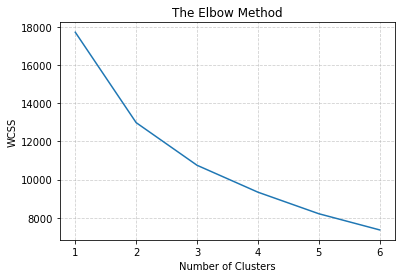

In [46]:
#using elbow method to find the optimal no of clusters
WCSS=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_features)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,7),WCSS)
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

In [40]:
#fitting k-means to the dataset
kmeans=KMeans(n_clusters=3, init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(scaled_features)

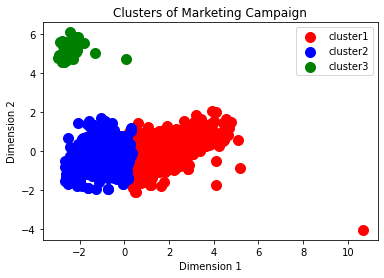

In [47]:
colours=['red','blue','green']
for i in range(3):
    plt.scatter(scaled_feature[y_kmeans==i,0],
               scaled_feature[y_kmeans==i,1],
               s=100,c=colours[i],label='cluster'
                +str(i+1))
    
plt.legend()
plt.title('Clusters of Marketing Campaign')
plt.xlabel("Dimension 1")
plt.ylabel('Dimension 2')
plt.show()

## Hierarchical Clustering

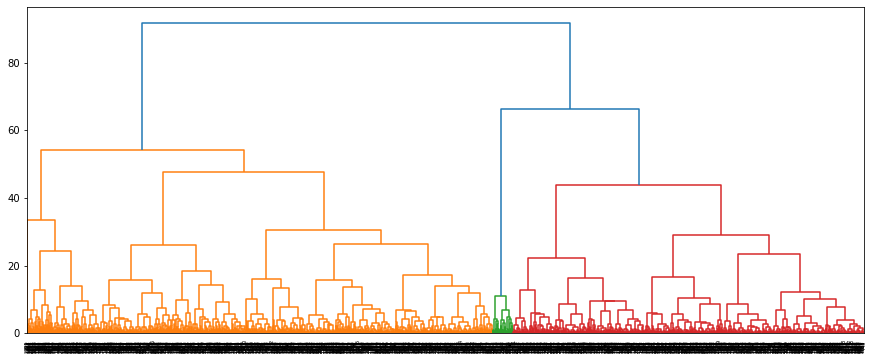

In [42]:
#Dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))
dendrogram=sch.dendrogram(sch.linkage(scaled_features,method='ward'))
plt.show()

In [43]:
# Fitting Hierarchical Clustering to the dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(scaled_features)

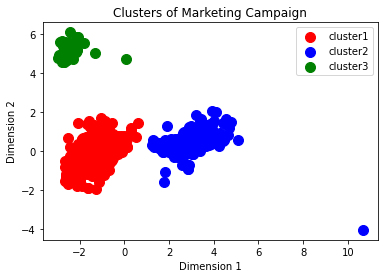

In [48]:
colours=['red','blue','green']
for i in range(3):
    plt.scatter(scaled_feature[y_hc==i,0],
               scaled_feature[y_hc==i,1],
               s=100,c=colours[i],label='cluster'
                +str(i+1))
    
plt.legend()
plt.title('Clusters of Marketing Campaign')
plt.xlabel("Dimension 1")
plt.ylabel('Dimension 2')
plt.show()